In [77]:
#auto reload jupyter to update notebook w.r.t changes in other linked files:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
from post_train_plot import plot_coefficients, plot_scatter_relationships
from train_and_evaluate import *

In [79]:
df_train, df_test, X_train, y_train, X_test, y_test, predictors, predictands = load_train_test_data(predictand='both')
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

Train and test data loaded successfully! Missing values dropped.
X_train shape: (193677, 25), y_train shape: (193677, 2)


In [80]:
# MultiLinear Regression
#train
mlr_model = train_mlr(X_train, y_train)
# Evaluate
evaluate_model(mlr_model, X_test, y_test, "Multi-Linear Regression")


Multi-Linear Regression MSE: 0.6752376342394673
Multi-Linear Regression RMSE: 0.8213970905908738


(0.6752376342394673, 0.8213970905908738)

In [81]:
# XGBoost
#train
xgboost = train_xgboost(X_train, y_train)
#Evaluate Models
evaluate_model(xgboost, X_test, y_test, "XGboost")

XGboost MSE: 0.5952681768149701
XGboost RMSE: 0.7710564816675287


(0.5952681768149701, 0.7710564816675287)

In [82]:
# random_forest = train_rf(X_train, y_train)
# #train
# evaluate_model(random_forest, X_test, y_test, "Random Forest")


RMSE score of different models: see results.md


</br></br>
liquid water path (lwp) as predictand:
MLR = 0.81 ;
XGBoost = 0.76 ;
Random Forest = 0.79
</br>
cloud fraction (clf) as predictand:
MLR = 0.78 ;
XGBoost = 0.74 ;
Random Forest = 0.73
</br>
with both liquid water path (lwp) and cloud fraction (clf) as predictand:
MLR = 0.80 ;
XGBoost = 75 ;
Random Forest = 0.75




MLR Coefficients:
          blh      cape     mlspf     mslhf     msshf      q700      q850  \
clf  0.128157  0.003924  0.058888  0.244452 -0.185527 -0.649559 -0.331093   
lwp  0.250656  0.004624  0.156642  0.133839 -0.119258 -0.384561 -0.200071   

        rh700     rh850       sst  ...      u850       v10      v700  \
clf  0.585687  0.531722  0.075374  ... -0.073297  0.019769  0.007352   
lwp  0.209271  0.332130  0.068308  ... -0.087298 -0.083622  0.019744   

         v850      w700      w850  Terra_descending       lsm       eis  \
clf  0.013679  0.002221 -0.021540          0.054121 -0.053579  0.568173   
lwp  0.071130  0.012415 -0.057946          0.074016 -0.004592  0.475571   

         lnNd  
clf  0.404981  
lwp -0.245464  

[2 rows x 25 columns]


<Figure size 1000x500 with 0 Axes>

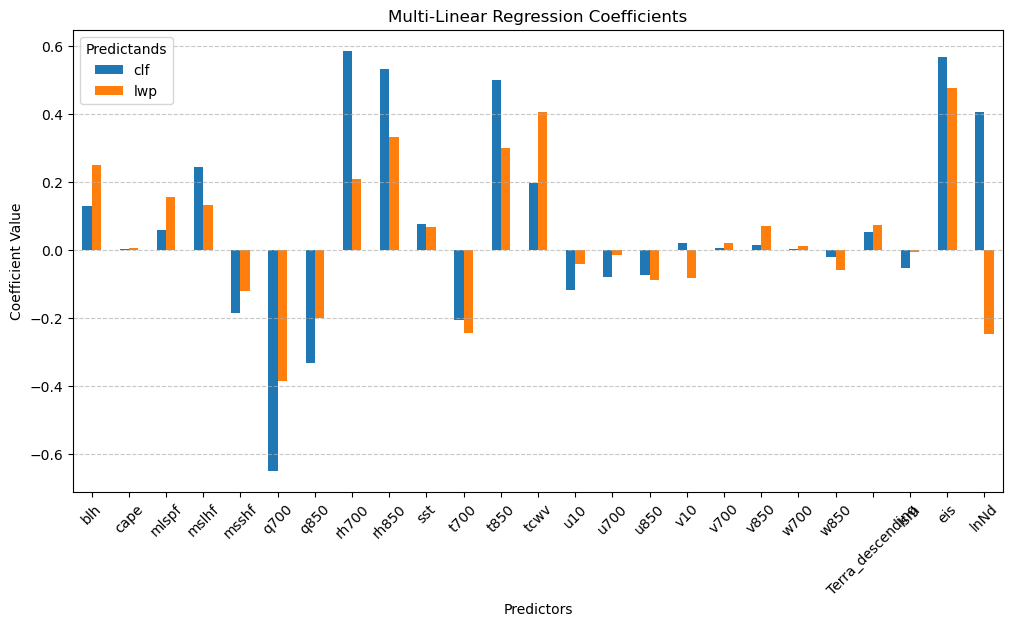

,blh,cape,mlspf,mslhf,msshf,q700,q850,rh700,rh850,sst,t700,t850,tcwv,u10,u700,u850,v10,v700,v850,w700,w850,Terra_descending,lsm,eis,lnNd
clf,0.128157,0.003924,0.058888,0.244452,-0.185527,-0.649559,-0.331093,0.585687,0.531722,0.075374,-0.206769,0.499069,0.196901,-0.116108,-0.079051,-0.073297,0.019769,0.007352,0.013679,0.002221,-0.021540,0.054121,-0.053579,0.568173,0.404981
lwp,0.250656,0.004624,0.156642,0.133839,-0.119258,-0.384561,-0.200071,0.209271,0.332130,0.068308,-0.245451,0.299720,0.406603,-0.039738,-0.014681,-0.087298,-0.083622,0.019744,0.071130,0.012415,-0.057946,0.074016,-0.004592,0.475571,-0.245464


In [83]:
#Getting MLR coefficients
mlr_coefficients = get_mlr_coefficients(mlr_model, predictors, predictands)
#plotting
plot_coefficients(mlr_coefficients)


coefficients_table = mlr_coefficients.style.set_properties(**{'background-color': 'white',
                                                    'color': 'black',
                                                    'border-color': 'black',
                                                    'border-style': 'solid',
                                                    'border-width': '1px'})

# Displaying the styled DataFrame
coefficients_table

Major contributors to lwp: </br> eis (0.45) ; tcwv (0.43) ; q700 (-0.40)

In [84]:
#Major contributors
#top_clf = mlr_coefficients.loc['clf'].nlargest(5)
top_lwp = mlr_coefficients.loc['lwp'].nlargest(5)

#print("Top 5 for contributors 'clf':\n", top_clf)
print("\nTop 5 for contributors 'lwp':\n", top_lwp)


Top 5 for contributors 'lwp':
 eis      0.475571
tcwv     0.406603
rh850    0.332130
t850     0.299720
blh      0.250656
Name: lwp, dtype: float64
